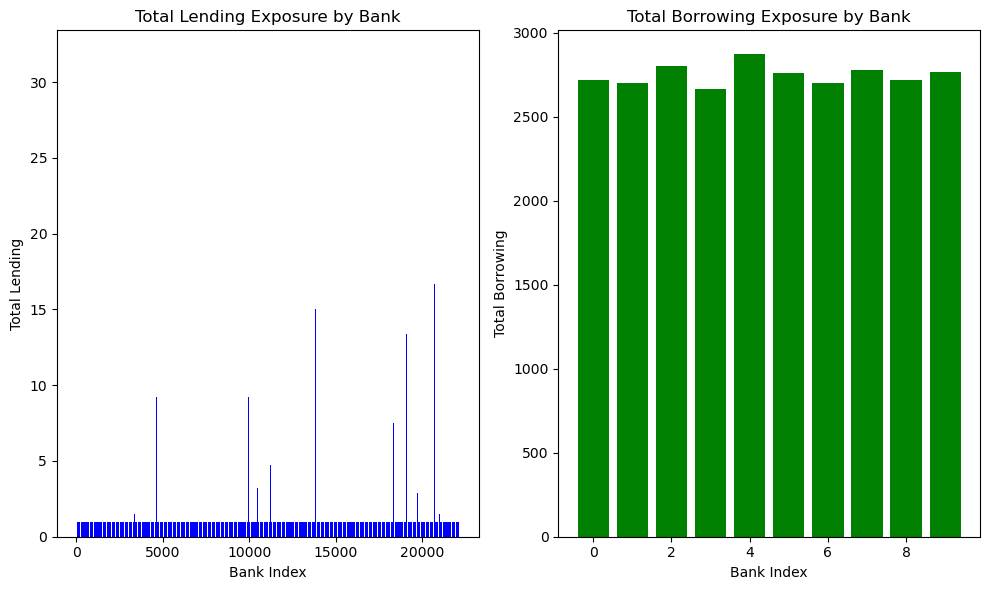

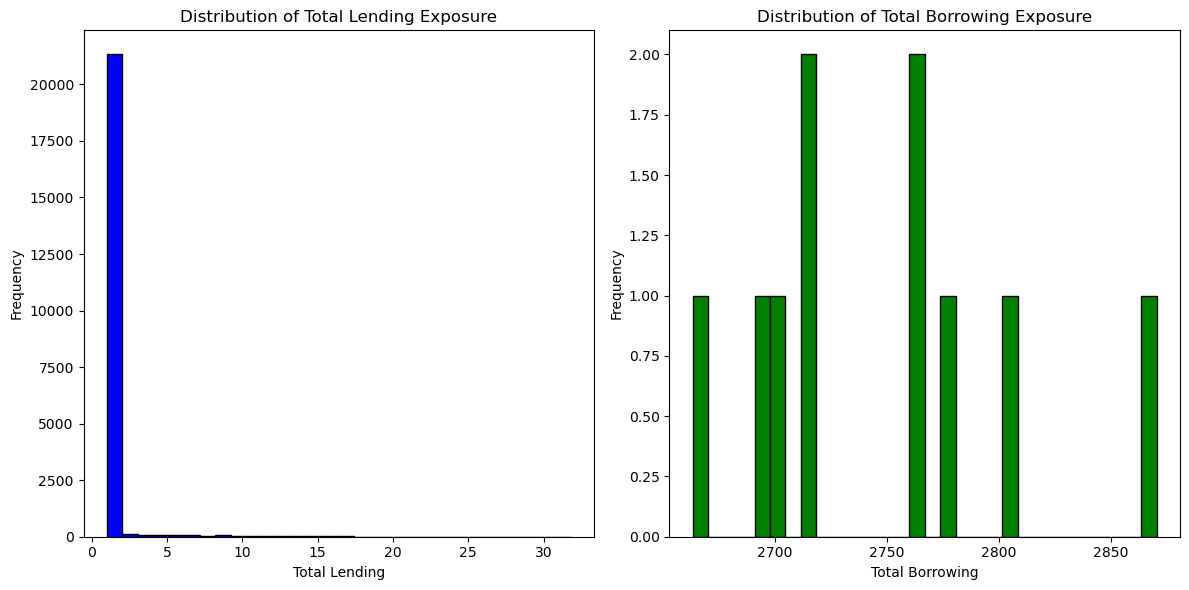

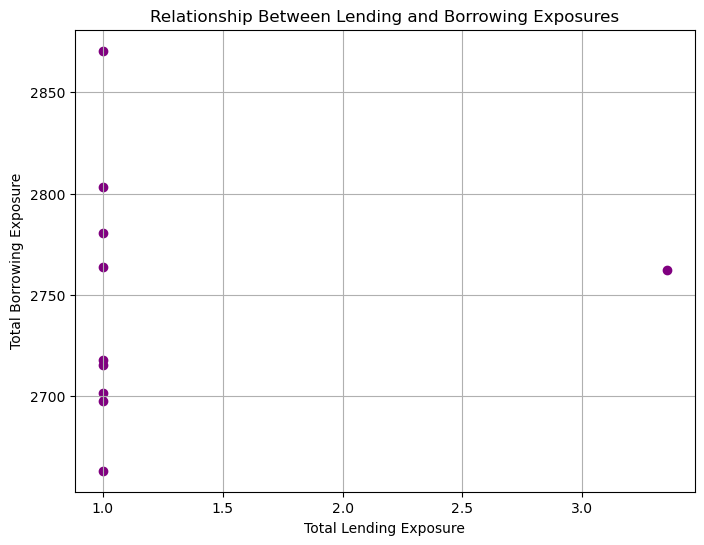

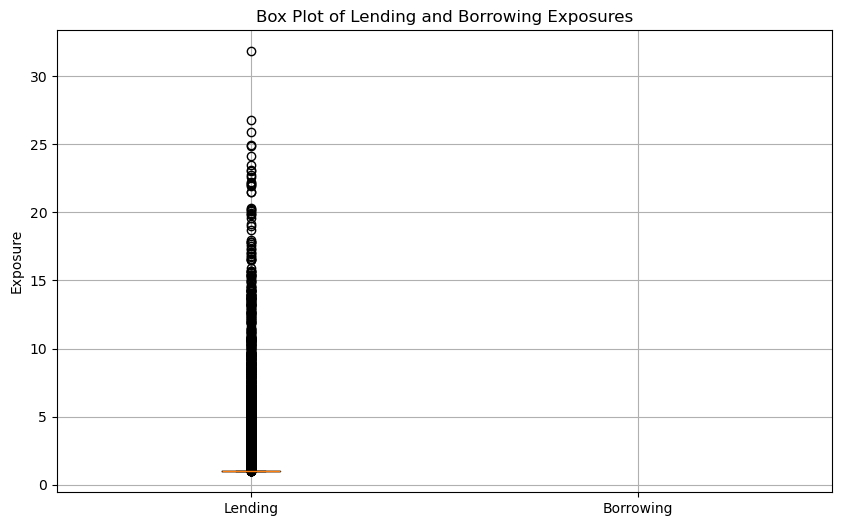

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Function to clean and extract matrix rows
def clean_matrix_rows_v2(matrix_rows):
    cleaned_matrix = []
    
    # Loop through each captured row, clean, and convert to float values
    for row in matrix_rows:
        # Remove any square brackets and clean up spaces
        cleaned_row = row.replace('[', '').replace(']', '').strip()
        # Convert the cleaned row into a list of floats
        cleaned_row = list(map(float, cleaned_row.split()))
        cleaned_matrix.append(cleaned_row)
    
    # Convert to a DataFrame
    return pd.DataFrame(cleaned_matrix)

# Load the interbank exposure file (replace with your file path if needed)
interbank_exposure_path = 'interbank-exposure.csv'

# Read the raw file
with open(interbank_exposure_path, 'r') as file:
    raw_data = file.read()

# Extract matrix rows using regex
matrix_rows = re.findall(r'\[\s*(.*?)\s*\]', raw_data)

# Clean the matrix rows with the improved function
cleaned_interbank_exposure_df = clean_matrix_rows_v2(matrix_rows)

# Calculate total borrowing and lending exposure for each bank
total_lending = cleaned_interbank_exposure_df.sum(axis=1)  # Sum across rows (lending)
total_borrowing = cleaned_interbank_exposure_df.sum(axis=0)  # Sum across columns (borrowing)

# Create a simple DataFrame to summarize the results
exposure_summary = pd.DataFrame({
    'Total Lending Exposure': total_lending,
    'Total Borrowing Exposure': total_borrowing
})

# Plot the total lending and borrowing exposures for each bank
plt.figure(figsize=(10, 6))

# Plot lending
plt.subplot(1, 2, 1)
plt.bar(exposure_summary.index, exposure_summary['Total Lending Exposure'], color='blue')
plt.title('Total Lending Exposure by Bank')
plt.xlabel('Bank Index')
plt.ylabel('Total Lending')

# Plot borrowing
plt.subplot(1, 2, 2)
plt.bar(exposure_summary.index, exposure_summary['Total Borrowing Exposure'], color='green')
plt.title('Total Borrowing Exposure by Bank')
plt.xlabel('Bank Index')
plt.ylabel('Total Borrowing')

plt.tight_layout()
plt.show()

# Additional Visualizations

# Create histograms to visualize the distribution of total lending and borrowing exposures
plt.figure(figsize=(12, 6))

# Histogram for lending exposure
plt.subplot(1, 2, 1)
plt.hist(exposure_summary['Total Lending Exposure'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Total Lending Exposure')
plt.xlabel('Total Lending')
plt.ylabel('Frequency')

# Histogram for borrowing exposure
plt.subplot(1, 2, 2)
plt.hist(exposure_summary['Total Borrowing Exposure'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Total Borrowing Exposure')
plt.xlabel('Total Borrowing')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot to visualize the relationship between lending and borrowing exposures
plt.figure(figsize=(8, 6))
plt.scatter(exposure_summary['Total Lending Exposure'], exposure_summary['Total Borrowing Exposure'], color='purple')
plt.title('Relationship Between Lending and Borrowing Exposures')
plt.xlabel('Total Lending Exposure')
plt.ylabel('Total Borrowing Exposure')
plt.grid(True)
plt.show()

# Box plot to show the spread of lending and borrowing exposures
plt.figure(figsize=(10, 6))
plt.boxplot([exposure_summary['Total Lending Exposure'], exposure_summary['Total Borrowing Exposure']], labels=['Lending', 'Borrowing'])
plt.title('Box Plot of Lending and Borrowing Exposures')
plt.ylabel('Exposure')
plt.grid(True)
plt.show()
